In [155]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import urllib

In [3]:
init_notebook_mode(connected=True)

In [4]:
crime = pd.read_csv('VICTIM_OF_MURDER_0.csv')

In [5]:
crime.head()

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,Andhra Pradesh,2001,Male,35,59,88,827,952,215,2176
1,Andhra Pradesh,2001,Female,38,15,43,269,175,67,607
2,Andhra Pradesh,2001,Total,73,74,131,1096,1127,282,2783
3,Arunachal Pradesh,2001,Male,0,0,0,31,32,4,67
4,Arunachal Pradesh,2001,Female,0,0,0,10,4,2,16


In [6]:
crime_GB_ST_YR=crime.groupby(['STATE/UT','YEAR']).sum().reset_index().sort_values('STATE/UT', ascending=False)

In [7]:
crime_GB_ST_YR[crime_GB_ST_YR['STATE/UT']=='Andhra Pradesh']

,STATE/UT,YEAR,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
12,Andhra Pradesh,2001,146,148,262,2192,2254,564,5566
13,Andhra Pradesh,2002,24,40,26,2640,2022,550,5302
14,Andhra Pradesh,2003,50,78,110,2740,2288,562,5828
15,Andhra Pradesh,2004,70,50,58,2314,2218,570,5280
16,Andhra Pradesh,2005,76,42,56,2554,2502,626,5856
17,Andhra Pradesh,2006,56,40,30,2734,2236,784,5880
18,Andhra Pradesh,2007,90,48,78,2578,2360,546,5700
19,Andhra Pradesh,2008,72,42,128,2532,2144,606,5524
20,Andhra Pradesh,2009,60,36,58,2094,2152,550,4950
21,Andhra Pradesh,2010,44,56,38,2394,1608,936,5076


In [8]:
xticks = list(crime_GB_ST_YR[crime_GB_ST_YR['STATE/UT']=='Andhra Pradesh']['YEAR'])

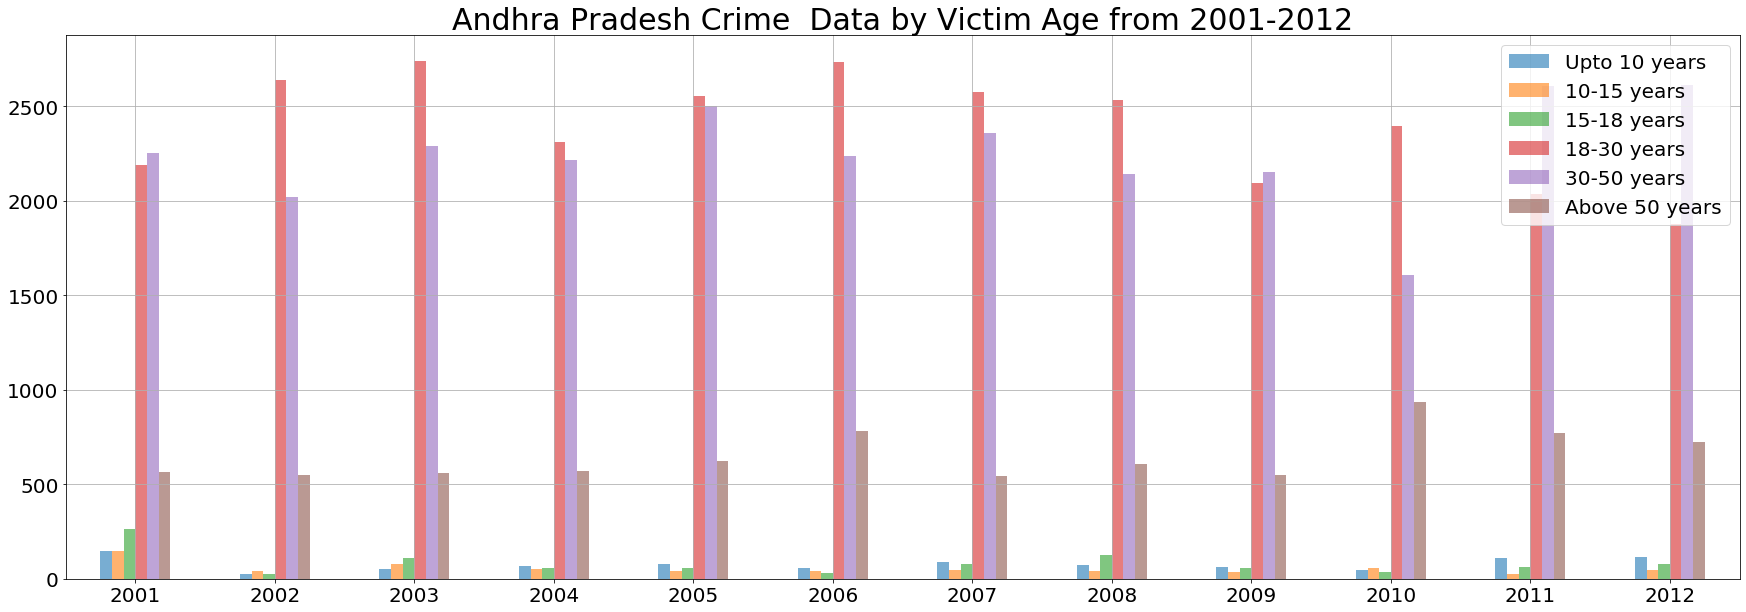

In [9]:
ax=crime_GB_ST_YR[crime_GB_ST_YR['STATE/UT']=='Andhra Pradesh'].iloc[:,2:-1].plot(kind='bar',figsize=(30,10),alpha=0.6,label=list(crime_GB_ST_YR[crime_GB_ST_YR['STATE/UT']=='Andhra Pradesh']['YEAR']))
ax.set_xticklabels(crime_GB_ST_YR[crime_GB_ST_YR['STATE/UT']=='Andhra Pradesh']['YEAR'],size=20,rotation = 0)
ax.set_title('Andhra Pradesh Crime  Data by Victim Age from 2001-2012',size = 30)
plt.yticks(size = 20)
plt.legend(loc='best',prop={'size': 20})
plt.grid()
plt.show()


In [166]:
crime_top10_10years=crime.groupby(['STATE/UT']).sum().reset_index().sort_values('Total', ascending=False).head(10)
crime_bottom10_10years=crime.groupby(['STATE/UT']).sum().reset_index().sort_values('Total', ascending=True).head(10)

In [15]:
crime_top10_10years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 32 to 28
Data columns (total 9 columns):
STATE/UT          10 non-null object
YEAR              10 non-null int64
Upto 10 years     10 non-null int64
10-15 years       10 non-null int64
15-18 years       10 non-null int64
18-30 years       10 non-null int64
30-50 years       10 non-null int64
Above 50 years    10 non-null int64
Total             10 non-null int64
dtypes: int64(8), object(1)
memory usage: 800.0+ bytes


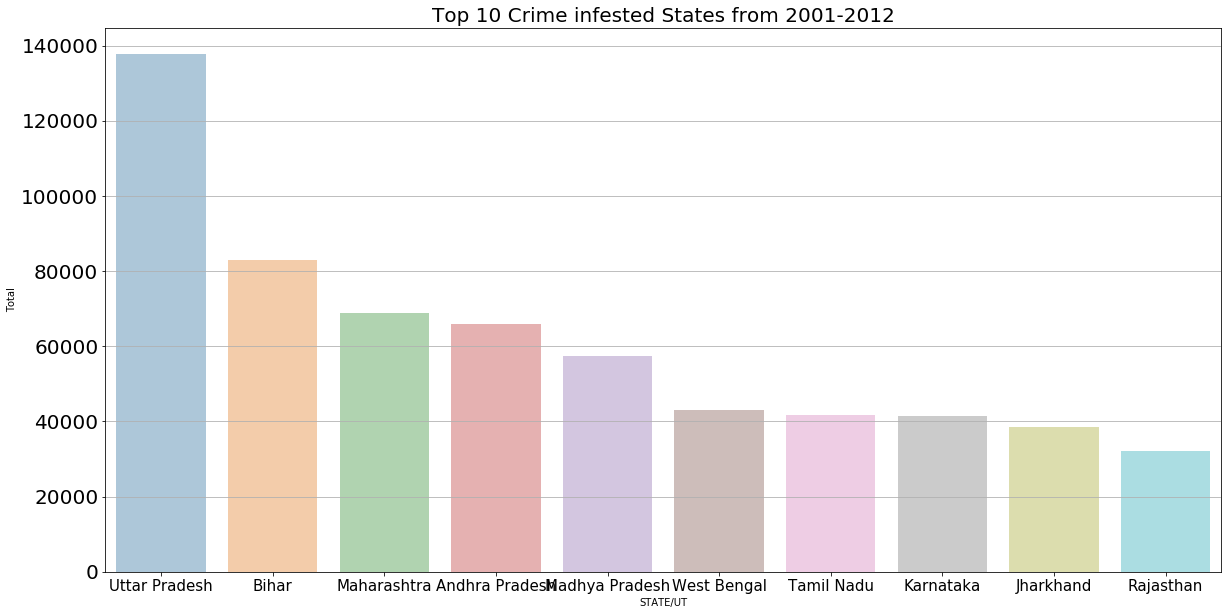

In [163]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =0,size=15)
plt.yticks(size=20)
plt.grid()
ax= sb.barplot(x='STATE/UT',y='Total',data=crime_top10_10years,alpha = 0.4)
plt.title('Top 10 Crime infested States from 2001-2012', size = 20 )
plt.show()


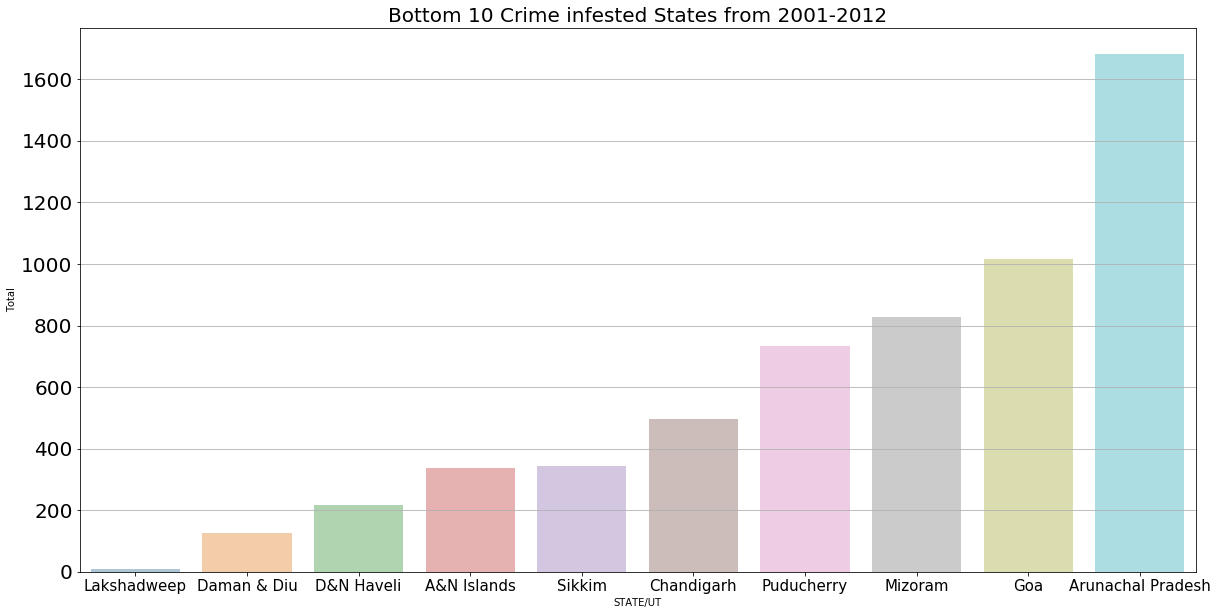

In [172]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =0,size=15)
plt.yticks(size=20)
plt.grid()
ax= sb.barplot(x='STATE/UT',y='Total',data=crime_bottom10_10years,alpha = 0.4)
plt.title('Bottom 10 Crime infested States from 2001-2012', size = 20 )
plt.show()

In [80]:
crime_wb=crime[crime['STATE/UT']=='West Bengal']

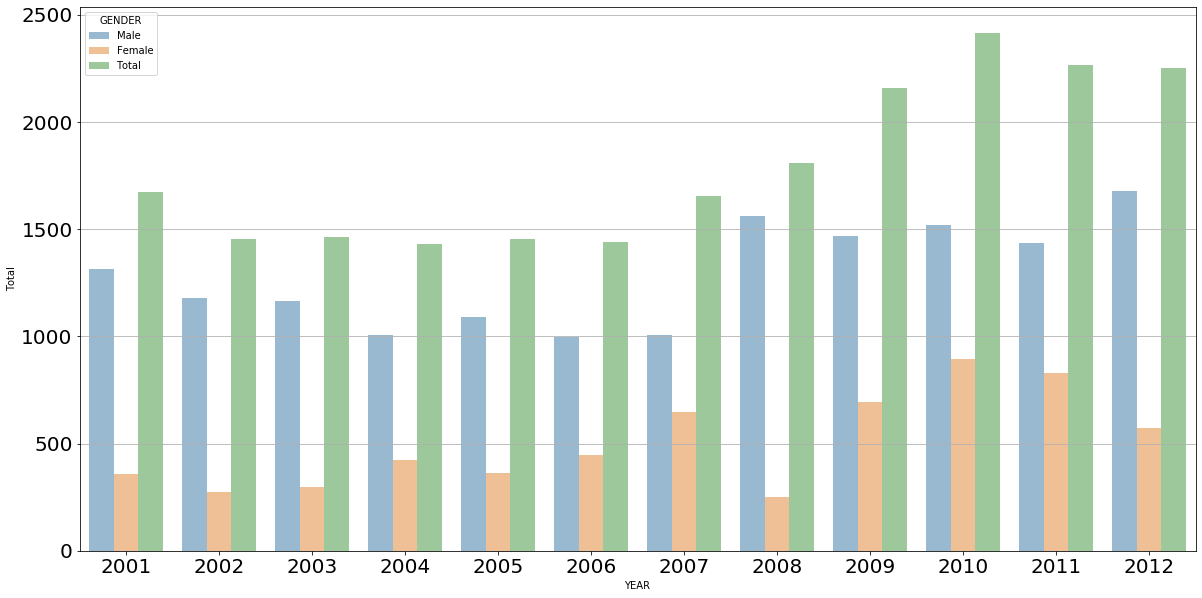

In [106]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =0,size=20)
plt.yticks(size=20)
plt.grid()
sb.barplot(x='YEAR',y='Total',data=crime_wb,hue='GENDER',alpha=0.5)

In [100]:
crime_wb

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
81,West Bengal,2001,Male,1,2,2,676,552,82,1315
82,West Bengal,2001,Female,0,0,1,213,132,12,358
83,West Bengal,2001,Total,1,2,3,889,684,94,1673
183,West Bengal,2002,Male,0,0,0,664,465,52,1181
184,West Bengal,2002,Female,3,0,0,188,72,9,272
185,West Bengal,2002,Total,3,0,0,852,537,61,1453
288,West Bengal,2003,Male,1,0,2,606,506,52,1167
289,West Bengal,2003,Female,2,2,2,186,95,10,297
290,West Bengal,2003,Total,3,2,4,792,601,62,1464
393,West Bengal,2004,Male,0,0,0,518,439,51,1008


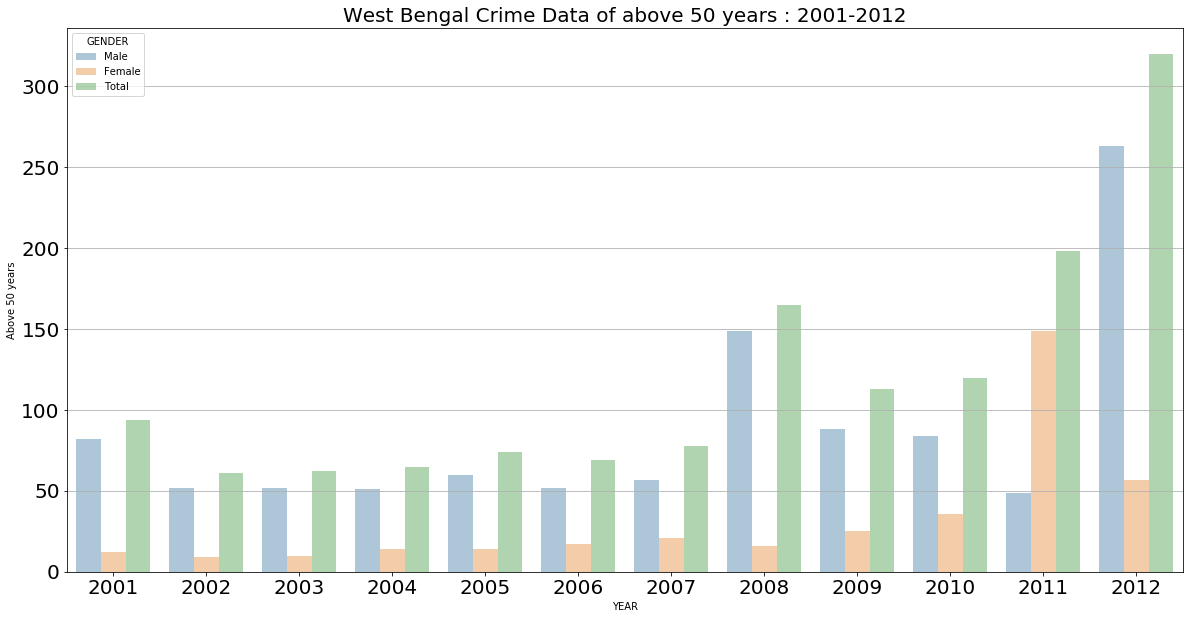

In [120]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =0,size=20)
plt.yticks(size=20)
plt.grid()
sb.barplot(x='YEAR',y='Above 50 years',data=crime_wb,alpha=0.4,hue='GENDER')
plt.title('West Bengal Crime Data of above 50 years : 2001-2012', size = 20 )
plt.show()

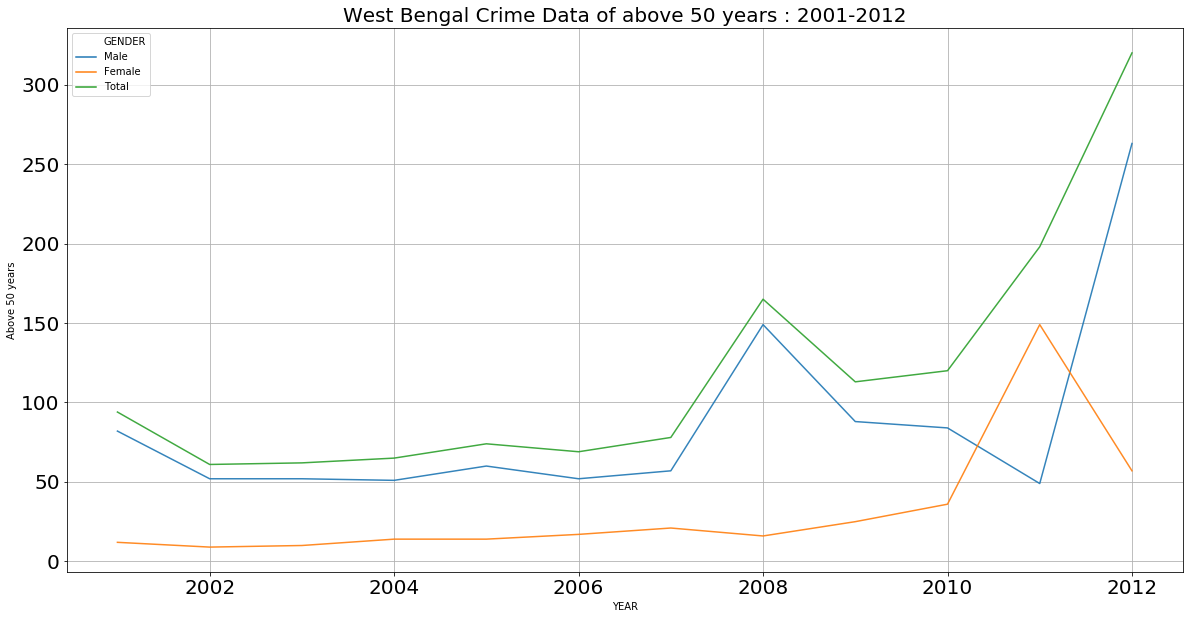

In [122]:
plt.figure(figsize=(20,10))
plt.xticks(rotation =0,size=20)
plt.yticks(size=20)
plt.grid()
sb.lineplot(x='YEAR',y='Above 50 years',data=crime_wb,alpha=0.9,hue='GENDER')
plt.title('West Bengal Crime Data of above 50 years : 2001-2012', size = 20 )
plt.show()

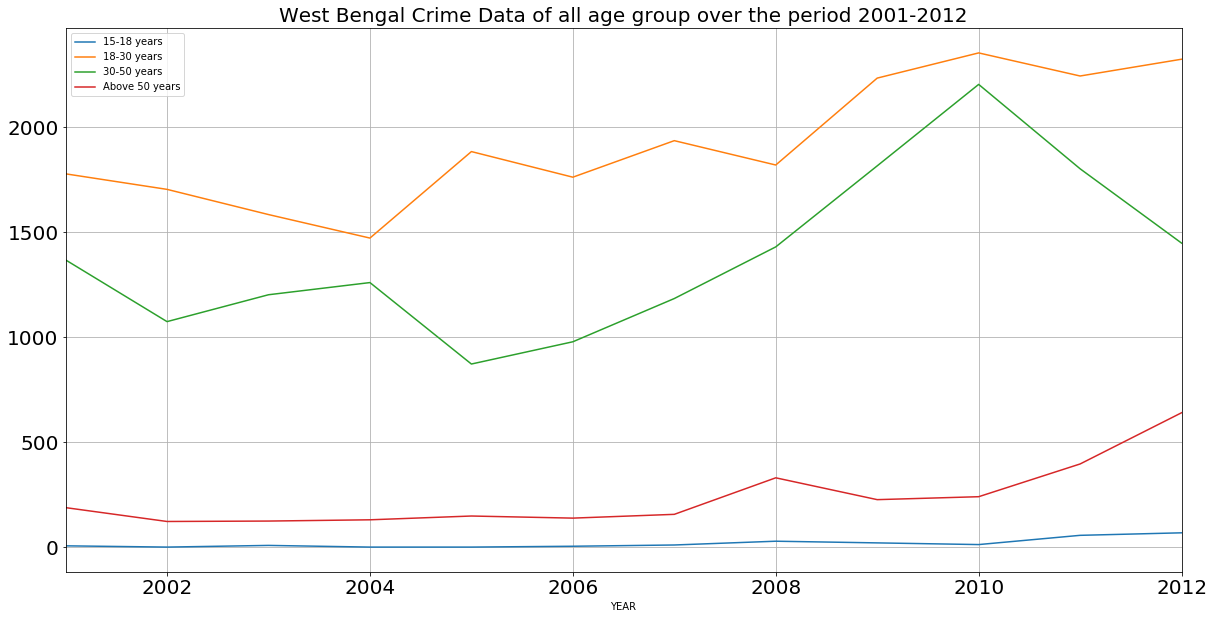

In [153]:
crime_wb.groupby('YEAR').sum().iloc[:,2:6].plot(figsize=(20,10))
plt.xticks(rotation =0,size=20)
plt.yticks(size=20)
plt.grid()
plt.title('West Bengal Crime Data of all age group over the period 2001-2012', size = 20 )
plt.show()